Open the file and get the data into two arrays. Data is arranegd first value is x second value is y. 
<br>
1 is win 
0 is Loss
</br>
 Eg: " 1 3 1 8 0 1"
</br>
Won in 3 rounds
Won in 8 round 
Lost in 1 round


In [ ]:
with open('test.dat') as f:
   fileList =  [line for line in f][0].split() 
x = []
y = []
#Loop through variables 2 at a time and append them to lists 
for i in range(0,len(fileList),2):
  x.append(fileList[i])
  y.append(fileList[i+1])


In [ ]:
averageLength = sum([int(i) for i in y])/10000
print("Average length of game", averageLength)
import statistics
print("Standard Deviation:",statistics.stdev([int(i) for i in y]))

Average length of game 3.3868
Standard Deviation: 3.022531940266801


In [ ]:
import pandas as pd
data = {"Win/Loss": x,"Throws":y}
# Create DataFrame  
df = pd.DataFrame(data)  
wins = {}
loss = {}

#Make two separate lists with wins and losses for further analysis
for i in range(len(x)):
  #If its a win
  if x[i] == "1":
    #temp variable get current value for wins in the same amount of throws
    t = wins.get(int(y[i]),0)
    wins[int(y[i])] = t+1
  #If loss
  else:
    t =loss.get(int(y[i]),0)
    loss[int(y[i])] = t+1 
  
xW = []
yW = []
totalWins= 0
print(wins)
print(loss)

#Do a table with number of wins at each point
for k,v in wins.items():
  xW.append(k)
  yW.append(v) 
  totalWins +=v
winsDf = pd.DataFrame({"Throws": xW, "Games": yW})

xL = []
yL = []
totalLoss = 0
for k,v in loss.items():
  xL.append(k)
  yL.append(v) 
  totalLoss +=v

lossDf = pd.DataFrame({"Throws": xL, "Games": yL})


#Probability of total wins = wins/(loss+wins)
totalWins/(totalWins+totalLoss)
print("Total Wins:",totalWins,"Total Loss:", totalLoss)
print(totalWins, "/" , totalWins + totalLoss)
print("Probability of wins = ",totalWins/(totalWins+totalLoss)


{7: 135, 2: 809, 1: 2224, 13: 23, 5: 286, 3: 582, 9: 69, 4: 370, 14: 17, 12: 30, 6: 199, 8: 106, 10: 59, 11: 36, 17: 5, 16: 12, 18: 8, 15: 11, 21: 3, 23: 1, 20: 2, 19: 1, 35: 1}
{4: 580, 1: 1104, 5: 417, 7: 209, 2: 1087, 9: 108, 8: 148, 10: 77, 6: 294, 3: 766, 12: 49, 11: 52, 13: 42, 14: 23, 19: 7, 15: 19, 21: 1, 20: 6, 25: 1, 16: 8, 17: 5, 18: 6, 22: 1, 24: 1}
Total Wins: 4989 Total Loss: 5011
4989 / 10000
Probability of wins =  0.4989


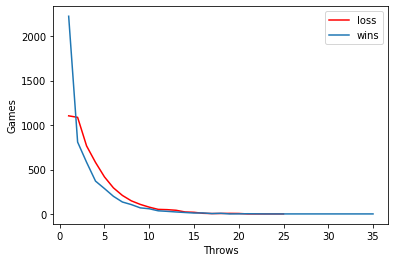

In [ ]:
import seaborn as sns
#Visualising the number of wins and losses 
sns.lineplot(data=lossDf, x='Throws', y='Games', color="red", label ="loss")
sns.lineplot(data=winsDf, x='Throws', y='Games', label ="wins")

In [ ]:
print("Lost games \n",lossDf.sort_values(by=['Throws']).to_string(index=False))
print("Won games \n",winsDf.sort_values(by=['Throws']).to_string(index=False))


Lost games 
  Throws  Games
      1   1104
      2   1087
      3    766
      4    580
      5    417
      6    294
      7    209
      8    148
      9    108
     10     77
     11     52
     12     49
     13     42
     14     23
     15     19
     16      8
     17      5
     18      6
     19      7
     20      6
     21      1
     22      1
     24      1
     25      1
Won games 
  Throws  Games
      1   2224
      2    809
      3    582
      4    370
      5    286
      6    199
      7    135
      8    106
      9     69
     10     59
     11     36
     12     30
     13     23
     14     17
     15     11
     16     12
     17      5
     18      8
     19      1
     20      2
     21      3
     23      1
     35      1


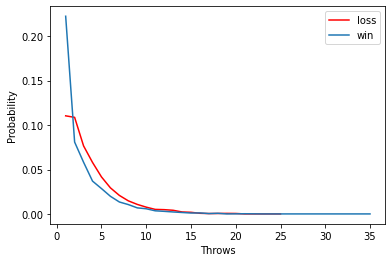

In [ ]:
#Display as probabilities

pL = [y/(totalWins+totalLoss)for y in yL]
pW = [y/(totalWins+totalLoss) for y in yW]

probsLossDf = pd.DataFrame({"Throws":xL, "Probability":pL})
probsWinDf = pd.DataFrame({"Throws":xW, "Probability":pW})
sns.lineplot(data=probsLossDf, x='Throws', y='Probability', color="red", label ="loss")
sns.lineplot(data=probsWinDf, x='Throws', y='Probability', label ="win")

In [ ]:
print(probsLossDf.sort_values(by=['Throws']).to_string(index=False))
print(probsWinDf.sort_values(by=['Throws']).to_string(index=False))


 Throws  Probability
      1       0.1104
      2       0.1087
      3       0.0766
      4       0.0580
      5       0.0417
      6       0.0294
      7       0.0209
      8       0.0148
      9       0.0108
     10       0.0077
     11       0.0052
     12       0.0049
     13       0.0042
     14       0.0023
     15       0.0019
     16       0.0008
     17       0.0005
     18       0.0006
     19       0.0007
     20       0.0006
     21       0.0001
     22       0.0001
     24       0.0001
     25       0.0001
 Throws  Probability
      1       0.2224
      2       0.0809
      3       0.0582
      4       0.0370
      5       0.0286
      6       0.0199
      7       0.0135
      8       0.0106
      9       0.0069
     10       0.0059
     11       0.0036
     12       0.0030
     13       0.0023
     14       0.0017
     15       0.0011
     16       0.0012
     17       0.0005
     18       0.0008
     19       0.0001
     20       0.0002
     21       0.0003
     23      

In [ ]:
#Average length of games 
import statistics
y = [int(i) for i in y]
statistics.std(y)

NameError: ignored